## Домашнее задание №1
Ишмаева Бэлла

In [13]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [14]:
df = pd.read_csv('adult.data.txt', header = None, skipinitialspace = True)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", 
       "marital-status", "occupation", "relationship", "race", "sex", 
       "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]

In [15]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [16]:
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [17]:
df.isnull().sum().values.sum() == 0

True

Пропусков в датафрейме нет

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [18]:
df.sex.value_counts()
# => выбросов нет

Male      21790
Female    10771
Name: sex, dtype: int64

In [19]:
number_of_male = df[df['sex'] == 'Male'].shape[0]
number_of_female = df[df['sex'] == 'Female'].shape[0]

print("Мужчин в выборке: ", number_of_male)
print("Женщин в выборке: ", number_of_female)

Мужчин в выборке:  21790
Женщин в выборке:  10771


### Вопрос 2
Каков средний возраст мужчин?


**Проверим выбросы**

In [20]:
print('Минимальный восраст: ', df.age.values.min())
print('Максимальный восраст: ', df.age.values.max())
# => выбросов нет

Минимальный восраст:  17
Максимальный восраст:  90


In [21]:
average_male_hight = df[df['sex'] == 'Male']['age'].values.mean()

print("Средний возраст мужчин в выборке: ", average_male_hight.round(2))

Средний возраст мужчин в выборке:  39.43


### Вопрос 3
Какова доля граждан США?

In [22]:
usa_citizens = df[df['native-country'] == "United-States"].shape[0]/df.shape[0]

print("Доля граждан США в выборке: ", round(usa_citizens, 3))

Доля граждан США в выборке:  0.896


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

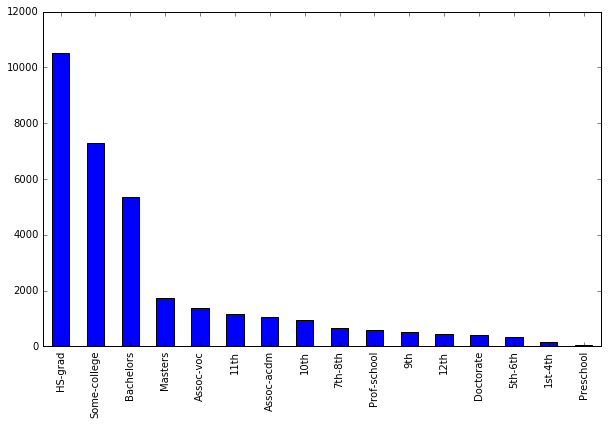

In [24]:
df['education'].value_counts().plot(kind='bar', figsize=(10, 6))

### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [25]:
print(df['marital-status'].value_counts().index.tolist())
# => выбросов нет

['Married-civ-spouse', 'Never-married', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse']


In [26]:
print("Среднее переменной fnlwgt для разведённых людей: ", 
      round(df[df['marital-status'] == 'Divorced']['fnlwgt'].mean(), 2))
print("Стандартное отклонение переменной fnlwgt для разведённых людей: ", 
      round(df[df['marital-status'] == 'Divorced']['fnlwgt'].std(), 2))

Среднее переменной fnlwgt для разведённых людей:  185802.79
Стандартное отклонение переменной fnlwgt для разведённых людей:  105646.79


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

**Учитывая следующее ранжирование:**

**Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate**

**будем считать высшим образованием: Bachelors, Masters, Doctorate**

In [27]:
educ = df[df['50K'] == '>50K']['education'].value_counts()
share = educ[['Bachelors','Masters', 'Doctorate']].sum()/educ.sum()

print("Доля людей с высшим образованием среди всех, у кого ЗП >50K: ",  round(share, 2))
print("Доля < 0.5 => нет, утверждение неверное")

Доля людей с высшим образованием среди всех, у кого ЗП >50K:  0.44
Доля < 0.5 => нет, утверждение неверное


### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [28]:
df.groupby(['race', 'sex'])['age'].max().to_frame()

age
race               sex        
Amer-Indian-Eskimo Female   80
                   Male     82
Asian-Pac-Islander Female   75
                   Male     90
Black              Female   90
                   Male     90
Other              Female   74
                   Male     77
White              Female   90
                   Male     90

### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [29]:
print(df[df['occupation'] == 'Farming-fishing']['native-country'].value_counts().index.tolist())

['United-States', 'Mexico', '?', 'Puerto-Rico', 'Philippines', 'Guatemala', 'Italy', 'Cuba', 'Canada', 'El-Salvador', 'Vietnam', 'Hong', 'England', 'Ireland', 'Portugal', 'Cambodia', 'Germany', 'Yugoslavia', 'Japan', 'Poland', 'France']


### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [30]:
ratio_1 = df[(df['education'] == 'Bachelors') & (df['sex'] == 'Male')].shape[0]/df[(df['education'] == 'Masters') & (df['sex'] == 'Male')].shape[0]
ratio_2 = df[(df['education'] == 'Bachelors') & (df['sex'] == 'Female')].shape[0]/df[(df['education'] == 'Masters') & (df['sex'] == 'Female')].shape[0]
print("Мужчины-бакалавры / Мужчины-магистры:  ", round(ratio_1, 2))
print("Женщины-бакалавры / Женщины-магистры:  ", round(ratio_2, 2))
print('Отношение "Мужчины-бакалавры / Мужчины-магистры" больше')

Мужчины-бакалавры / Мужчины-магистры:   3.15
Женщины-бакалавры / Женщины-магистры:   3.02
Отношение "Мужчины-бакалавры / Мужчины-магистры" больше


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [36]:
h_p_w = df['hours-per-week'].value_counts()
max_h = max(h_p_w.index)
print("максимальное количество рабочих часов в неделю: ", max_h)
print("Кол-во людей, работаюющих столько: ",h_p_w[h_p_w.index == max_h].values[0])
print("Их заработок: ",'\n', df[df['hours-per-week'] == 99]['50K'].value_counts().to_frame()['50K'])

максимальное количество рабочих часов в неделю:  99
Кол-во людей, работаюющих столько:  85
Их заработок:  
 <=50K    60
>50K     25
Name: 50K, dtype: int64
